In [1]:
# %pip install requests

## Required Packages

In [ ]:
import requests
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## Sign-up

In [3]:
sing_up_url='https://aqs.epa.gov/data/api/signup?email=leolincoln9804@gmail.com'

## Data Retrieval

In [13]:
flag = 1
if flag == 1:   
    # pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
else:
    pd.reset_option('display.max_rows', None)
    pd.reset_option('display.max_columns', None)

In [4]:
email = 'leolincoln9804@gmail.com'
API_KEY = 'mauvemouse89'

# email = "test@aqs.api"
# API_KEY = "test"

In [ ]:
# (lon low, lat low, lon upp, lat upp)
COORDS =  (-74.01, 40.75, -73.86, 40.88)
TIME_WINDOW = ('2021-06-01', '2021-09-01')

# AQS API URL for retrieving air quality data based on bounding box
BASE_URL = "https://aqs.epa.gov/data/api/sampleData/byBox"

# API request parameters
config = {
    "email": email, 
    "key": API_KEY,
    "params": {
        88101: "PM2.5",
        44201: "Ozone",
        # 42604: "NH3",
        42602: "NO2",
        42401: "SO2",
        42101: "CO",
        81102: "PM10",
        42601: "NO",
        43502: "VOC (Volatile Organic Compounds)"
    },
    "bdate": TIME_WINDOW[0].replace("-", ""),  
    "edate": TIME_WINDOW[1].replace("-", ""),
    "minlat": COORDS[1],  # Lower latitude boundary
    "maxlat": COORDS[3],  # Upper latitude boundary
    "minlon": COORDS[0],  # Lower longitude boundary
    "maxlon": COORDS[2],   # Upper longitude boundary
}

SAVE_DIR = "../data/raw/"

for param_code, param_name in config['params'].items():
    
    params = {
        "email": config["email"],
        "key": config["key"],
        "bdate": config["bdate"],
        "edate": config["edate"],
        "minlat": config["minlat"],
        "maxlat": config["maxlat"],
        "minlon": config["minlon"],
        "maxlon": config["maxlon"],
        "param": param_code
    }
    
    # Send request to the AQS API
    response = requests.get(BASE_URL, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Verify if the response contains data
        if "Data" in data:
            df = pd.DataFrame(data["Data"])  # Convert JSON data to a pandas DataFrame
            
            # Save the data to a CSV file
            
            df.to_csv(SAVE_DIR+f"{param_code}_{param_name}_AQS.csv", index=False, encoding="utf-8")
            print("Data has been successfully saved")
        else:
            print("No data returned from the API.")
    else:
        print(f"Error fetching API data: {response.status_code}")
        print(response.text)


Data has been successfully saved


## Data Processing

### Cacbon Monoxide (42101)

In [ ]:
co_aqs_data_path = "..\\data\\raw\\42101_CO_AQS.csv"
co_aqs_data = pd.read_csv(filepath_or_buffer=co_aqs_data_path)

co_aqs_data_df = pd.DataFrame(data=co_aqs_data)

co_aqs_data_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,time_local,date_gmt,time_gmt,sample_measurement,units_of_measure,units_of_measure_code,sample_duration,sample_duration_code,sample_frequency,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,36,5,133,42101,1,40.86790,-73.87809,WGS84,Carbon monoxide,2021-06-01,01:00,2021-06-01,06:00,0.562,Parts per million,7,1 HOUR,1,HOURLY,0.02,NaN,NaN,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,New York,Bronx,2021-07-07,35620
1,36,5,133,42101,1,40.86790,-73.87809,WGS84,Carbon monoxide,2021-06-01,05:00,2021-06-01,10:00,0.899,Parts per million,7,1 HOUR,1,HOURLY,0.02,NaN,NaN,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,New York,Bronx,2021-07-07,35620
2,36,5,133,42101,1,40.86790,-73.87809,WGS84,Carbon monoxide,2021-06-01,09:00,2021-06-01,14:00,0.449,Parts per million,7,1 HOUR,1,HOURLY,0.02,NaN,NaN,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,New York,Bronx,2021-07-07,35620
3,36,5,133,42101,1,40.86790,-73.87809,WGS84,Carbon monoxide,2021-06-01,13:00,2021-06-01,18:00,0.304,Parts per million,7,1 HOUR,1,HOURLY,0.02,NaN,NaN,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,New York,Bronx,2021-07-07,35620
4,36,5,133,42101,1,40.86790,-73.87809,WGS84,Carbon monoxide,2021-06-01,17:00,2021-06-01,22:00,0.168,Parts per million,7,1 HOUR,1,HOURLY,0.02,NaN,NaN,FRM,INSTRUMENTAL - Gas Filter Correlation Teledyne...,593,New York,Bronx,2021-07-07,35620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,34,3,10,42101,1,40.85355,-73.96618,NAD83,Carbon monoxide,2021-09-01,04:00,2021-09-01,09:00,0.400,Parts per million,7,1 HOUR,1,HOURLY,0.50,NaN,NaN,FRM,INSTRUMENTAL - NONDISPERSIVE INFRARED,54,New Jersey,Bergen,2021-12-16,35620
6692,34,3,10,42101,1,40.85355,-73.96618,NAD83,Carbon monoxide,2021-09-01,08:00,2021-09-01,13:00,0.300,Parts per million,7,1 HOUR,1,HOURLY,0.50,NaN,NaN,FRM,INSTRUMENTAL - NONDISPERSIVE INFRARED,54,New Jersey,Bergen,2021-12-16,35620
6693,34,3,10,42101,1,40.85355,-73.96618,NAD83,Carbon monoxide,2021-09-01,12:00,2021-09-01,17:00,0.300,Parts per million,7,1 HOUR,1,HOURLY,0.50,NaN,NaN,FRM,INSTRUMENTAL - NONDISPERSIVE INFRARED,54,New Jersey,Bergen,2021-12-16,35620
6694,34,3,10,42101,1,40.85355,-73.96618,NAD83,Carbon monoxide,2021-09-01,16:00,2021-09-01,21:00,0.300,Parts per million,7,1 HOUR,1,HOURLY,0.50,NaN,NaN,FRM,INSTRUMENTAL - NONDISPERSIVE INFRARED,54,New Jersey,Bergen,2021-12-16,35620


In [ ]:
# Extract Specific Coordinates
# co_aqs_data_df["coordinates"] = co_aqs_data_df["longitude"].astype(str) + ", " + co_aqs_data_df["latitude"].astype(str)

# Extract unique coordinate pairs (longitude, latitude)
unique_coords = co_aqs_data_df[["longitude", "latitude"]].drop_duplicates()
unique_coords

,longitude,latitude
0,-73.87809,40.86790
1068,-73.94825,40.81976
2194,-73.96618,40.85355


In [49]:
# Compute mean and standard deviation of CO concentration at each unique coordinate
avg_co_per_coor = co_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(["mean", "std"]).reset_index()

avg_co_per_coor.rename(columns={"mean": "average_CO", "std": "std_CO"}, inplace=True)

avg_co_per_coor

,longitude,latitude,average_CO,std_CO
0,-73.96618,40.85355,0.307957,0.100968
1,-73.94825,40.81976,0.241188,0.100097
2,-73.87809,40.86790,0.241009,0.107262


### Sulfur Dioxide (42401)

In [ ]:
so2_aqs_data_path = "..\\data\\raw\\42401_SO2_AQS.csv"
so2_aqs_data = pd.read_csv(filepath_or_buffer=so2_aqs_data_path)

so2_aqs_data_df = pd.DataFrame(data=so2_aqs_data)
so2_aqs_data

In [28]:
# Extract unique coordinate pairs (longitude, latitude)
unique_coords = so2_aqs_data_df[["longitude", "latitude"]].drop_duplicates()
unique_coords

,longitude,latitude
0,-73.90200,40.8160
1654,-73.87809,40.8679


In [36]:
# Compute the average CO concentration at each unique coordinate
avg_so2_per_coor = so2_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(['mean', 'std']).reset_index()

avg_so2_per_coor.rename(columns={"mean": "average_SO2", "std": "std_SO2"}, inplace=True)
avg_so2_per_coor

,longitude,latitude,average_SO2,std_SO2
0,-73.90200,40.8160,0.078949,0.245058
1,-73.87809,40.8679,0.374844,0.281939


### Nitrogen Dioxide (42602)


In [38]:
# Define the file path for NO2 data
no2_aqs_data_path = "..\\data\\raw\\42602_NO2_AQS.csv"

# Load the NO2 data from CSV
no2_aqs_data = pd.read_csv(filepath_or_buffer=no2_aqs_data_path)

# Convert to DataFrame
no2_aqs_data_df = pd.DataFrame(data=no2_aqs_data)

In [39]:
# Extract unique coordinate pairs (longitude, latitude)
unique_coords_no2 = no2_aqs_data_df[["longitude", "latitude"]].drop_duplicates()
unique_coords_no2

,longitude,latitude
0,-73.90200,40.81600
1584,-73.87809,40.86790
3804,-73.96618,40.85355


In [ ]:

# Compute mean and standard deviation of NO2 concentration at each unique coordinate
avg_no2_per_coor = no2_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
avg_no2_per_coor.rename(columns={"mean": "average_NO2", "std": "std_NO2"}, inplace=True)

# Display the result
avg_no2_per_coor

,longitude,latitude,average_NO2,std_NO2
0,-73.96618,40.85355,11.651742,6.769948
1,-73.90200,40.81600,11.709931,7.229293
2,-73.87809,40.86790,9.713485,6.507927


### Ozone (44201)

In [42]:
o3_aqs_data_path = "..\\data\\raw\\44201_OZONE_AQS.csv"
o3_aqs_data = pd.read_csv(filepath_or_buffer=o3_aqs_data_path)

o3_aqs_data_df = pd.DataFrame(data=o3_aqs_data)

# Compute the mean and standard deviation at each unique coordinate
avg_o3_per_coor = o3_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(['mean', 'std']).reset_index()

# Rename columns
avg_o3_per_coor.rename(columns={"mean": "average_O3", "std": "std_O3"}, inplace=True)

avg_o3_per_coor

,longitude,latitude,average_O3,std_O3
0,-73.991994,40.870436,0.027882,0.019392
1,-73.948250,40.819760,0.031929,0.016691
2,-73.902000,40.816000,0.031660,0.016373
3,-73.878090,40.867900,0.032529,0.016519


### PM2.5 (88101)

In [44]:
pm25_aqs_data_path = "..\\data\\raw\\88101_PM2.5_AQS.csv"
pm25_aqs_data = pd.read_csv(filepath_or_buffer=pm25_aqs_data_path)

pm25_aqs_data_df = pd.DataFrame(data=pm25_aqs_data)

# Compute the mean and standard deviation at each unique coordinate
avg_pm25_per_coor = pm25_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(['mean', 'std']).reset_index()

# Rename columns
avg_pm25_per_coor.rename(columns={"mean": "average_PM25", "std": "std_PM25"}, inplace=True)

avg_pm25_per_coor

,longitude,latitude,average_PM25,std_PM25
0,-73.96618,40.85355,10.287641,8.619439
1,-73.93432,40.79970,9.853191,5.541615
2,-73.90200,40.81600,10.882043,9.932259
3,-73.87809,40.86790,9.458621,5.185317


### PM10 (81102)

In [45]:
pm10_aqs_data_path = "..\\data\\raw\\81102_PM10_AQS.csv"
pm10_aqs_data = pd.read_csv(filepath_or_buffer=pm10_aqs_data_path)

pm10_aqs_data_df = pd.DataFrame(data=pm10_aqs_data)

# Compute the mean and standard deviation at each unique coordinate
avg_pm10_per_coor = pm10_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(['mean', 'std']).reset_index()

# Rename columns
avg_pm10_per_coor.rename(columns={"mean": "average_PM10", "std": "std_PM10"}, inplace=True)

avg_pm10_per_coor

,longitude,latitude,average_PM10,std_PM10
0,-73.902,40.816,16.84375,9.722304


### Nitric Monoxide (42601)

In [46]:
# Load NO data
no_aqs_data_path = "..\\data\\raw\\42601_NO_AQS.csv"  # Adjust the file path if needed
no_aqs_data = pd.read_csv(filepath_or_buffer=no_aqs_data_path)

# Convert to DataFrame
no_aqs_data_df = pd.DataFrame(data=no_aqs_data)

# Extract unique coordinate pairs (longitude, latitude)
unique_coords_no = no_aqs_data_df[["longitude", "latitude"]].drop_duplicates()

# Compute the average NO concentration and standard deviation at each unique coordinate
avg_no_per_coor = no_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
avg_no_per_coor.rename(columns={"mean": "average_NO", "std": "std_NO"}, inplace=True)

# Display result
avg_no_per_coor


,longitude,latitude,average_NO,std_NO
0,-73.96618,40.85355,4.735380,7.801217
1,-73.90200,40.81600,2.205247,5.412540
2,-73.87809,40.86790,1.090558,2.657836


### VOC (Volatile Organic Compounds)

In [47]:
voc_aqs_data_path = "..\\data\\raw\\43502_VOC (Volatile Organic Compounds)_AQS.csv"  # Adjust the parameter code if needed
voc_aqs_data = pd.read_csv(filepath_or_buffer=voc_aqs_data_path)

voc_aqs_data_df = pd.DataFrame(data=voc_aqs_data)

# Compute the mean and standard deviation at each unique coordinate
avg_voc_per_coor = voc_aqs_data_df.groupby(["longitude", "latitude"])["sample_measurement"].agg(['mean', 'std']).reset_index()

# Rename columns
avg_voc_per_coor.rename(columns={"mean": "average_VOC", "std": "std_VOC"}, inplace=True)

avg_voc_per_coor

,longitude,latitude,average_VOC,std_VOC
0,-73.90200,40.8160,3.031250,1.274489
1,-73.87809,40.8679,2.864583,1.292118


## Save Data

In [50]:
SAVE_DIR = "../data/air_quality/"

# Define filenames for each pollutant
co_saved_name = "co_data_mean_and_std.csv"
so2_saved_name = "so2_data_mean_and_std.csv"
no2_saved_name = "no2_data_mean_and_std.csv"
o3_saved_name = "o3_data_mean_and_std.csv"
pm10_saved_name = "pm10_data_mean_and_std.csv"
pm25_saved_name = "pm25_data_mean_and_std.csv"
voc_saved_name = "voc_data_mean_and_std.csv"
no_saved_name = "no_data_mean_and_std.csv"

# Save each dataset to CSV
avg_co_per_coor.to_csv(SAVE_DIR + co_saved_name, index=False)
avg_so2_per_coor.to_csv(SAVE_DIR + so2_saved_name, index=False)
avg_no2_per_coor.to_csv(SAVE_DIR + no2_saved_name, index=False)
avg_o3_per_coor.to_csv(SAVE_DIR + o3_saved_name, index=False)
avg_pm10_per_coor.to_csv(SAVE_DIR + pm10_saved_name, index=False)
avg_pm25_per_coor.to_csv(SAVE_DIR + pm25_saved_name, index=False)
avg_voc_per_coor.to_csv(SAVE_DIR + voc_saved_name, index=False)
avg_no_per_coor.to_csv(SAVE_DIR + no_saved_name, index=False)

print("All air quality data has been saved successfully!")

All air quality data has been saved successfully!


In [51]:
data = pd.read_csv(filepath_or_buffer="..\\data\\raw\\81102_PM10_AQS.csv")
data

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,time_local,date_gmt,time_gmt,sample_measurement,units_of_measure,units_of_measure_code,sample_duration,sample_duration_code,sample_frequency,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,6/3/2021,0:00,6/3/2021,5:00,19,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
1,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,6/9/2021,0:00,6/9/2021,5:00,14,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
2,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,6/15/2021,0:00,6/15/2021,5:00,10,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
3,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,6/21/2021,0:00,6/21/2021,5:00,27,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
4,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,6/27/2021,0:00,6/27/2021,5:00,21,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
5,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,7/3/2021,0:00,7/3/2021,5:00,3,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
6,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,7/9/2021,0:00,7/9/2021,5:00,9,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
7,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,7/15/2021,0:00,7/15/2021,5:00,18,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
8,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,7/21/2021,0:00,7/21/2021,5:00,33,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620
9,36,5,110,81102,3,40.816,-73.902,WGS84,PM10 Total 0-10um STP,7/27/2021,0:00,7/27/2021,5:00,38,Micrograms/cubic meter (25 C),1,24 HOUR,7,EVERY 6TH DAY,1,NaN,NaN,FRM,R - P Co Partisol Model 2025 - Gravimetric,127,New York,Bronx,12/7/2021,35620


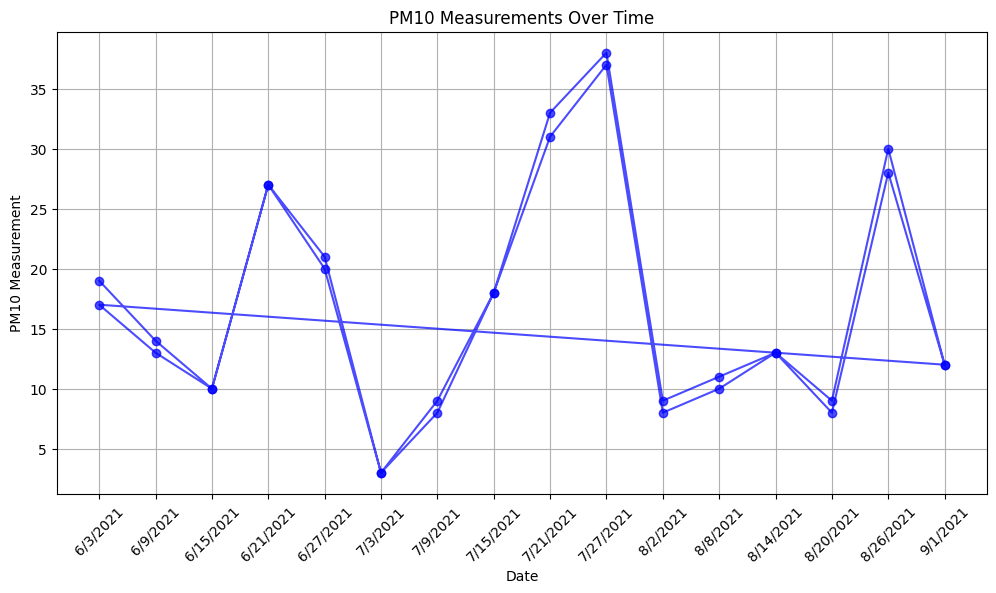

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(data["date_local"], data["sample_measurement"], marker='o', linestyle='-', color='b', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("PM10 Measurement")
plt.title("PM10 Measurements Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()